In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy import asarray
import tensorflow as tf
import cv2
import keras
import warnings
warnings.filterwarnings('ignore')

In [86]:
# To test the avilability of GPU!
print(tf.test.is_gpu_available())

False


In [87]:
print(tf.__version__)

1.3.0


In [88]:
keras.__version__

'2.1.3'

### Face Detection using MTCNN

In [89]:
import mtcnn

In [90]:
image1 = cv2.imread('images/Santosh/santosh1.jpg')
# image2 = cv2.imread('images/santosh2.jpg')
# image3 = cv2.imread('images/santosh3.jpg')
# image4 = cv2.imread('images/santosh4.jpeg')
# image5 = cv2.imread('images/santosh image.JPG')

In [91]:
from mtcnn.mtcnn import MTCNN
from PIL import Image
mtcnn = MTCNN()

In [92]:
image1new = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
cv2.namedWindow("Display", cv2.WINDOW_NORMAL)   
cv2.imshow('Display',image1new)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [93]:
# using asarray!
img_arr = asarray(image1new)
img_arr.shape

(2048, 2048, 3)

In [94]:
# using np.array!
img_arr = np.array(image1new)
img_arr.shape

(2048, 2048, 3)

In [95]:
box_result = mtcnn.detect_faces(img_arr)

In [96]:
box_result

[{'box': [688, 207, 328, 413],
  'confidence': 0.999997615814209,
  'keypoints': {'left_eye': (778, 383),
   'right_eye': (922, 361),
   'nose': (858, 451),
   'mouth_left': (798, 521),
   'mouth_right': (944, 502)}},
 {'box': [288, 1068, 82, 99],
  'confidence': 0.9967926144599915,
  'keypoints': {'left_eye': (321, 1109),
   'right_eye': (356, 1103),
   'nose': (347, 1128),
   'mouth_left': (330, 1149),
   'mouth_right': (359, 1143)}},
 {'box': [1086, 497, 48, 77],
  'confidence': 0.9748528599739075,
  'keypoints': {'left_eye': (1113, 522),
   'right_eye': (1131, 518),
   'nose': (1128, 539),
   'mouth_left': (1113, 556),
   'mouth_right': (1124, 554)}},
 {'box': [329, 1748, 86, 111],
  'confidence': 0.902112603187561,
  'keypoints': {'left_eye': (351, 1792),
   'right_eye': (389, 1784),
   'nose': (370, 1813),
   'mouth_left': (358, 1834),
   'mouth_right': (389, 1830)}}]

In [97]:
box_result[0]['box']

[688, 207, 328, 413]

In [98]:
x1, y1, width, height = box_result[0]['box']

In [99]:
x1, y1 = abs(x1), abs(y1)
x2, y2 = x1 + width, y1 + height                                                                                                

In [100]:
face = img_arr[y1:y2, x1:x2]

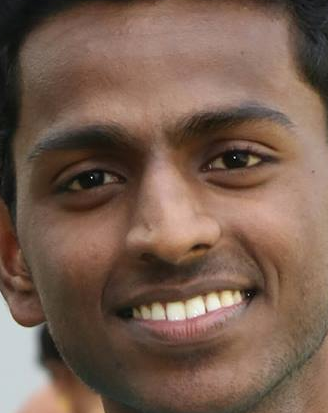

In [101]:
# One way to array to image!
cropped_face = Image.fromarray(face)
cropped_face                                                                                                                    

In [102]:
face_array = np.array(face)
face_array.ravel()

array([ 24,  25,  27, ..., 162, 125,  99], dtype=uint8)

In [103]:
# Second is simple plt.imshow! but not shape or reshap !
# cropped_face = plt.imshow(face)
# cropped_face.shape

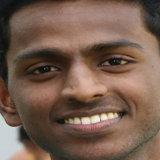

In [104]:
cropped_face_resize = cropped_face.resize((160,160))
cropped_face_resize

### Fucntion to Detect faces

In [105]:
def detect_face(filename,size=((160,160))):
    image = cv2.imread(filename)
#     cv2.imshow('Display',image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image_arr = np.array(image)
    box_res = mtcnn.detect_faces(image_arr)
    x, y, width, height = box_res[0]['box']
    x1, y1, x2, y2 = abs(x), abs(y), x + width, y + height
    face = image_arr[y1:y2, x1:x2]
    cropped_face = Image.fromarray(face)
    cropped_face_resize = cropped_face.resize(size)
    face_array = np.array(cropped_face_resize)
    return face_array

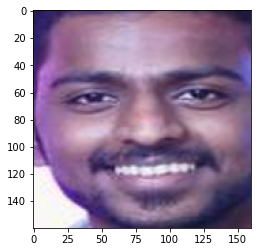

In [106]:
face = detect_face('images/Santosh/santosh image.JPG')
plt.imshow(face)

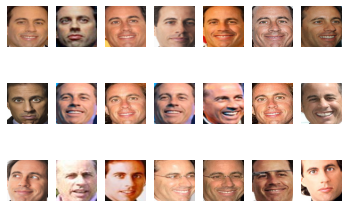

In [107]:
# Just to check all the images for one 
from os import listdir
folder = 'Dataset/train/jerry_seinfeld/'
i = 1
for filename in listdir(folder):
    path = folder + filename
#     print(path)
    face = detect_face(path)
    pyplot.subplot(3,7,i)
    pyplot.axis('off')
    pyplot.imshow(face)
    i += 1
pyplot.show()

# Face Dataset Creation!

In [108]:
# Trial of loading Faces!
def load_faces(directory):
    all_faces = []
    for filename in listdir(directory):
        path = directory + filename
        face = detect_face(path)
        all_faces.append(face)
    return all_faces

In [109]:
faces_loaded = load_faces('Dataset/train/ben_afflek/')

In [110]:
# Loding Train and Val!
def load_dataset(directory):
    x, y = [],[]
    for subdir in listdir(directory):
        path = directory + subdir + '/'
        faces = load_faces(path)
        labels = [subdir for _ in range(len(faces))]
        x.extend(faces)
        y.extend(labels)
    return np.array(x),np.array(y)

In [111]:
train_data = load_dataset('Dataset/train/')
test_data = load_dataset('Dataset/val/')

In [112]:
x_train, y_train = load_dataset('Dataset/train/')
print(x_train.shape,y_train.shape)

(124, 160, 160, 3) (124,)


In [113]:
x_test, y_test = load_dataset('Dataset/val/')
print(x_test.shape,y_test.shape)

(36, 160, 160, 3) (36,)


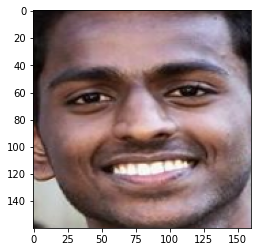

In [114]:
plt.imshow(train_data[0][100])

In [115]:
train_data[1][100]

'Santosh_Gopane'

In [116]:
from numpy import savez_compressed, expand_dims
# savez_compressed('test compression.npz',x_train,y_train,x_test,y_test)

In [117]:
# data = np.load('test compression.npz')
# # test compression.npz

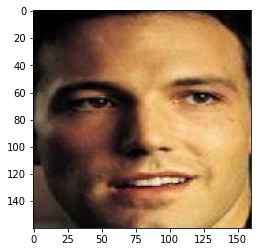

In [118]:
plt.imshow(x_test[0])

In [119]:
y_test[0]

'ben_afflek'

## Creating Face Embeddings

In [120]:
from keras.models import load_model
model = load_model('Model/facenet_keras.h5')

In [121]:
# model.summary()

In [122]:
model.inputs

[<tf.Tensor 'input_1_2:0' shape=(?, 160, 160, 3) dtype=float32>]

In [123]:
model.output

<tf.Tensor 'Bottleneck_BatchNorm_1/cond/Merge:0' shape=(?, 128) dtype=float32>

In [152]:
# EXPLORE THIS FUNCTION TO GENERATE FACE EMBEDDING!
def get_face_embedding(model,face_pixels):
    face_pixels = face_pixels.astype('float32')
#     Pixel value standardization
#     print('face_pixels')
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = ( face_pixels - mean ) / std
    sample = expand_dims(face_pixels,axis = 0)
    yhat = model.predict(sample)
    return yhat[0]

In [125]:
# Generating embedding of Train Dataset!
new_trainx = []
for face_pix in x_train:
    embedding = get_face_embedding(model,face_pix)
    new_trainx.append(embedding)
new_trainx = np.array(new_trainx)
print(new_trainx.shape)

face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face

In [126]:
# Generating embedding of Test Dataset!
new_testx = []
for face_pix in x_test:
    embedding = get_face_embedding(model,face_pix)
    new_testx.append(embedding)
new_testx = np.array(new_testx)
print(new_testx.shape)

face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
face_pixels
(36, 128)


In [127]:
new_trainx[0]

array([ 0.2137651 ,  1.196705  , -1.0838714 , -1.335522  ,  1.3948416 ,
       -0.29108635,  0.35734472, -0.62244123, -0.94024867,  0.5009451 ,
        1.2207241 ,  0.50796   ,  0.4898677 , -1.691513  ,  1.7980385 ,
       -0.40456498, -0.95479584, -1.814681  , -0.24559468, -1.447667  ,
        1.1104635 , -0.27581146,  0.3227083 ,  0.8826712 , -0.16508684,
       -2.9045744 ,  1.3776749 ,  0.34091747, -2.025089  , -0.55774754,
        0.08186575,  0.54999954,  1.9338281 ,  0.24345544, -0.28807685,
        0.46876776, -1.9104869 , -1.2213881 , -1.3176653 ,  0.16056305,
        0.41506666, -0.670764  , -1.2358838 ,  0.9395516 ,  0.8410278 ,
       -1.4711965 ,  1.4358356 ,  0.50335896,  2.2099695 , -0.292083  ,
       -1.8857673 , -0.8686009 , -0.03397208, -1.1845181 ,  1.0146856 ,
        0.26988894, -1.9316753 ,  0.70636785, -0.445127  , -0.46735048,
       -1.3215524 , -1.4083691 , -1.2839175 , -2.3219812 ,  0.34631202,
       -2.041509  , -1.5929084 ,  0.8552598 , -0.26800463, -0.73

In [128]:
y_train[0]

'ben_afflek'

In [129]:
from numpy import savez_compressed,load
savez_compressed('Embedded Data.npz',new_trainx,y_train,new_testx,y_test)

In [130]:
all_data = load('Embedded Data.npz')
x_train1,y_train1,x_test1, y_test1  = all_data['arr_0'],all_data['arr_1'],all_data['arr_2'],all_data['arr_3']

In [131]:
x_train1[0]

array([ 0.2137651 ,  1.196705  , -1.0838714 , -1.335522  ,  1.3948416 ,
       -0.29108635,  0.35734472, -0.62244123, -0.94024867,  0.5009451 ,
        1.2207241 ,  0.50796   ,  0.4898677 , -1.691513  ,  1.7980385 ,
       -0.40456498, -0.95479584, -1.814681  , -0.24559468, -1.447667  ,
        1.1104635 , -0.27581146,  0.3227083 ,  0.8826712 , -0.16508684,
       -2.9045744 ,  1.3776749 ,  0.34091747, -2.025089  , -0.55774754,
        0.08186575,  0.54999954,  1.9338281 ,  0.24345544, -0.28807685,
        0.46876776, -1.9104869 , -1.2213881 , -1.3176653 ,  0.16056305,
        0.41506666, -0.670764  , -1.2358838 ,  0.9395516 ,  0.8410278 ,
       -1.4711965 ,  1.4358356 ,  0.50335896,  2.2099695 , -0.292083  ,
       -1.8857673 , -0.8686009 , -0.03397208, -1.1845181 ,  1.0146856 ,
        0.26988894, -1.9316753 ,  0.70636785, -0.445127  , -0.46735048,
       -1.3215524 , -1.4083691 , -1.2839175 , -2.3219812 ,  0.34631202,
       -2.041509  , -1.5929084 ,  0.8552598 , -0.26800463, -0.73

In [132]:
y_train1[0]

'ben_afflek'

In [133]:
# This Cell is to understand the Get_embedding function!
test1 = x_train[0].astype('float32')
mean, std = test1.mean(),test1.std()
test2 = (test1 - mean)/std
test2 = test2.reshape(1,160,160,3)
# test2
# model.predict(test2)

In [134]:
# Both works the same
print(test2.reshape(1,160,160,3).shape)
print(expand_dims(test2,axis=0).shape)

(1, 160, 160, 3)
(1, 1, 160, 160, 3)


## Face Classification method-1

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

In [52]:
# First, it is a good practice to normalize the face embedding vectors.
in_encoder = Normalizer(norm='l2') 
x_train2 = in_encoder.transform(x_train1)
x_test2 = in_encoder.transform(x_test1)

(array([ 2.,  7.,  9., 16., 20., 19., 21., 17., 10.,  7.]),
 array([-2.9045744 , -2.39312   , -1.8816656 , -1.3702112 , -0.85875684,
        -0.34730244,  0.16415195,  0.67560637,  1.1870607 ,  1.6985152 ,
         2.2099695 ], dtype=float32),
 <BarContainer object of 10 artists>)

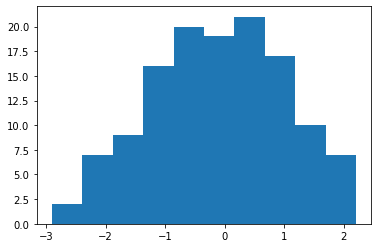

In [53]:
# Spot the difference betweem below graphs (X-Axis)
# 1. Without Normalize
plt.hist(x_train1[0])

(array([ 2.,  7.,  9., 16., 20., 19., 21., 17., 10.,  7.]),
 array([-0.2296907 , -0.18924542, -0.14880015, -0.10835487, -0.06790959,
        -0.02746432,  0.01298096,  0.05342624,  0.09387152,  0.13431679,
         0.17476207], dtype=float32),
 <BarContainer object of 10 artists>)

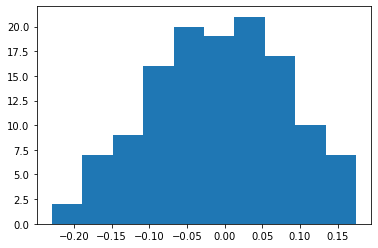

In [54]:
# 2. With Normalize
plt.hist(x_train2[0])

In [55]:
label_encode = LabelEncoder()
# It is just used to assign the classes!
label_encode.fit(y_train1)
# label_encode.fit(['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna','mindy_kaling'])
y_train2 = label_encode.transform(y_train1)
y_test2 = label_encode.transform(y_test1)

In [56]:
# label_encode.classes_

In [57]:
# y_train2 = y_train2.reshape(-1,1)
# y_test2 = y_test2.reshape(-1,1)

In [58]:
svc_model = SVC(kernel='linear',probability=True)
svc_model.fit(x_train2,y_train2)

SVC(kernel='linear', probability=True)

In [59]:
y_train2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [60]:
yhat_test = svc_model.predict(x_test2)
yhat_train = svc_model.predict(x_train2)

train = accuracy_score(y_train2,yhat_train)
test = accuracy_score(y_test2,yhat_test)
print('Training Score: ',train)
print('Testing Score: ',test)

Training Score:  1.0
Testing Score:  1.0


## Face Classification Method-2!

In [135]:
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.svm import SVC

In [136]:
# First, it is a good practice to normalize the face embedding vectors.
from sklearn.preprocessing import Normalizer

in_encoder = Normalizer(norm='l2') 
x_train2 = in_encoder.transform(x_train1)
x_test2 = in_encoder.transform(x_test1)

In [137]:
svc_model = SVC(kernel='linear',probability=True,gamma='auto',random_state=15)
svc_model.fit(x_train2,y_train1)

SVC(gamma='auto', kernel='linear', probability=True, random_state=15)

In [138]:
print('Training Accuracy: ',svc_model.score(x_train2,y_train1))
print('Testing Accuracy: ',svc_model.score(x_test2,y_test1))

Training Accuracy:  1.0
Testing Accuracy:  1.0


## Test the model

In [139]:
# For testing single sample!
svc_model.predict(x_test2[26].reshape(1,128))
# x_train2[0].reshape(1,128).shape 

array(['Santosh_Gopane'], dtype='<U14')

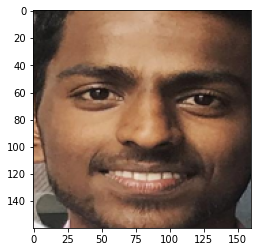

In [140]:
plt.imshow(x_test[26])

In [141]:
y_test[26]

'Santosh_Gopane'

In [142]:
svc_model.predict(x_test2[26].reshape(1,128))

array(['Santosh_Gopane'], dtype='<U14')

In [143]:
y_test1[26]

'Santosh_Gopane'

In [144]:
def Test_model(image):
    face_array = detect_face(image)
    embedding = get_face_embedding(model,face_array)
    in_encoder = Normalizer(norm='l2') 
    new_embedding = in_encoder.transform(embedding.reshape(-1,1))
    return new_embedding

In [145]:
test_image_path = 'Santosh Images/Test_afflek.jpg'
test = Test_model(test_image_path)

face_pixels


In [146]:
svc_model.predict(test.reshape(1,128))

array(['ben_afflek'], dtype='<U14')

In [147]:
image1 = cv2.imread('Santosh Images/Test_afflek.jpg')
cv2.imshow('Display',image1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [148]:
# test.reshape(1,128)

In [149]:
cap = cv2.VideoCapture(0)

In [150]:
while True:
    success,img = cap.read()
#     print(type(img))
#     result_box = detect_faces(img)
    cv2.imshow('Video',img)
    if cv2.waitKey(3) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

In [158]:
while True:
    success, img = cap.read()
    result_face_array = mtcnn.detect_faces(img)
#     print(result_face_array)
    try:
        x, y, width, height = result_face_array[0]['box']
        x1, y1, x2, y2 = abs(x), abs(y), x + width, y + height
        image_arr = np.array(img)
        face = image_arr[y1:y2, x1:x2]
        cropped_face = Image.fromarray(face)
        cropped_face_resize = cropped_face.resize(((160,160)))
        face_array = np.array(cropped_face_resize)
        
        embedding = get_face_embedding(model,face_array)
        in_encoder = Normalizer(norm ='l2')
        new_embedding = in_encoder.transform(embedding.reshape(-1,1))
        embedding_result = svc_model.predict(new_embedding.reshape(1,128))
        print(embedding_result)
        
        bounding_box = result_face_array[0]['box']
        cv2.rectangle(img,(bounding_box[0],bounding_box[1]),
                  (bounding_box[0]+bounding_box[2],bounding_box[1]+bounding_box[3]),
                 (255,0,0),2)
        cv2.putText(img, embedding_result[0], (bounding_box[0],bounding_box[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2, cv2.LINE_AA) 

        cv2.imshow('Video',img)
        if cv2.waitKey(33) & 0xFF == ord('q'):
            break
    except Exception as e:
        print(e)
        cv2.imshow('Video',img)
        if cv2.waitKey(33) & 0xFF == ord('q'):
            break
        print("You're out of Frame!")
#         break
cv2.destroyAllWindows()

['Santosh_Gopane']
['Santosh_Gopane']
list index out of range
You're out of Frame!
['Santosh_Gopane']
['elton_john']
['elton_john']
['Santosh_Gopane']
['Santosh_Gopane']
['Santosh_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Santosh_Gopane']
['Shital_Gopane']
['Santosh_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Santosh_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
list index out of range
You're out of Frame!
['Shital_Gopane']
['Santosh_Gopane']
['Shital_Gopane']
['Shital_Gopane']
list index out of range
You're out of Frame!
['Shital_Gopane']
list index out of range
You're out of Frame!
['Sant

['Santosh_Gopane']
list index out of range
You're out of Frame!
['elton_john']
['Santosh_Gopane']
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
['Santosh_Gopane']
['Shital_Gopane']
['Santosh_Gopane']
['Santosh_Gopane']
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
['Santosh_Gopane']
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
['Santosh_Gopane']
['Santosh_Gopane']
list index out of range
You're out of Frame!
['Santosh_Gopane']
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're 

You're out of Frame!
['Santosh_Gopane']
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
['elton_john']
list index out of range
You're out of Frame!
['Santosh_Gopane']
['Shital_Gopane']
['Shital_Gopane']
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
['Shital_Gopane']
list index out of range
You're out of Frame!
['Shital_Gopane']
list index out of range
You're out of Frame!
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['madonna']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Shi

list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
['Santosh_Gopane']
['Santosh_Gopane']
list index out of range
You're out of Frame!
['Shital_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Santosh_Gopane']
['Santosh_Gopane']
['Shital_Gopane']
['Shital_Gopane']
['Santosh_Gopane']
['Santosh_Gopane']
['elton_john']
['Shital_Gopane']
['elton_john']
['elton_john']
['Santosh_Gopane']
['Santosh_Gopane']
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of ra

You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
['Santosh_Gopane']
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
['Santosh_Gopane']
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Fra

list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index

list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
['madonna']
['Shital_Gopane']
['Shital_Gopane']
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
['Shital_Gopane']
list index out of range
You're out of Frame!
list index out of range
You're out

list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index

list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index

list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
['madonna']
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
['elton_john']
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You'

list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index

list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index

list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index out of range
You're out of Frame!
list index